Hunter Bennett  
Glass Lab  
Created 171205 | Last updated 171206  
____________  
We want to compare the results of our amln diet RNA Seq results with the CCL4 diet RNASeq Results

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline

# load extension for running R from python
%load_ext rpy2.ipython

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: package ‘methods’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: package ‘datasets’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: package ‘utils’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6

In [17]:
# define path to data
datapath = {'kupffer':'/data/mm10/Kupffer/RNA/', 'liver': '/data/mm10/Liver/RNA/'}

# define output directory
outdir = '/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4'
if not os.path.isdir(outdir):
    subprocess.call(['mkdir', outdir])

# define samples for both whole liver and kupffer
samples = {'kupffer':["aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12",
"aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16",
"aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16",
"balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12",
"balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16",
"balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16",
"balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12",
"balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16",
"balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16",
"NCoRWT_Kupffer_RNA_polyA_CCl4_24h_LN112b_JSS_16_01_21",
"NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN156dM_JSS_TDT_16_06_06",
"NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN159aM_JSS_TDT_16_06_06",
"NCoRWT_Kupffer_RNA_polyA_CCl4_6wk_NoActD_LN159bM_JSS_TDT_16_06_06",
"NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN156dM_JSS_16_06_06",
"NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN159aM_JSS_16_06_06",
"NCoRWT_Tim4LowKupffer_RNA_polyA_CCl4_6week_LN159bM_JSS_16_06_06",
"aj_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_AJ11A_TDT_JSS_17_03_10",
"aj_Tim4PosKupffer_RNA_polyA_Control14weeksOld_AJ11B_16_12_08",
"balbc_Tim4PosKupffer_RNA_polyA_ChowDiet_14WksAge_Balb11A_TDT_JSS_17_03_10",
"balbc_Tim4PosKupffer_RNA_polyA_Control14weeksOld_Balb11B_JSSTDT_16_12_08",
"NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13",
"NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13"],
'liver':["aj_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj10_TDT_JSS_20160531",
"aj_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj5_TDT_JSS_20160610",
"aj_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj7_TDT_JSS_20160531",
"balbc_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb10_TDT_JSS_20160531",
"balbc_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb12_TDT_JSS_20160531",
"balbc_WholeLiver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb5_TDT_JSS_20160610",
"NCoRWT_WholeLiver_RNA_polyA_CCl4_6wk_NoActD_LN156dM_JSS_TDT_16_06_06",
"NCoRWT_WholeLiver_RNA_polyA_CCl4_6wk_NoActD_LN159aM_JSS_TDT_16_06_06",
"NCoRWT_WholeLiver_RNA_polyA_CCl4_6wk_NoActD_LN159bM_JSS_TDT_16_06_06",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN47bM_JSS_15_12_01",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN47cM_JSS_15_12_01",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN47dM_JSS_15_12_01",
"NCoRWT_WholeLiver_RNA_polyA_MCDControlDiet_6wk_LN55bM_JSS_15_12_03",
"aj_WholeLiver_RNA_polyA_ControlDiet_21week_AJ7A_TDT_JSS_16_08_29.aj.star_shifted_from_AJ.sam",
"aj_WholeLiver_RNA_polyA_ControlDiet_21week_AJ7C_TDT_JSS_16_09_15.aj.star_shifted_from_AJ.sam",
"aj_WholeLiver_RNA_polyA_ControlDiet_21week_AJ7D_TDT_JSS_16_09_15.aj.star_shifted_from_AJ.sam",
"balbc_WholeLiver_RNA_polyA_ControlDiet_21week_BALB7A_JSS_TDT_16_08_29.balbcj.star_shifted_from_BALBCJ.sam",
"balbc_WholeLiver_RNA_polyA_ControlDiet_21week_BALB7B_JSS_TDT_16_09_15.balbcj.star_shifted_from_BALBCJ.sam",
"balbc_WholeLiver_RNA_polyA_ControlDiet_21week_BALB7D_JSS_TDT_16_09_15.balbcj.star_shifted_from_BALBCJ.sam"]}

bad_samples = {'LN140D': 'cancer', 'LN136B': 'cancer', 'LN148B': 'cancer',
              'LN144A': 'cancer', 'LN144C': 'cancer', 'LN182B': 'cancer',
              'LN182B': 'cancer', 'LN203B': 'cancer', 'BALB3A': 'splenomegaly',
              'BALB4D': 'hyper-fibrosis', 'LN148B': 'cancer', 'LN166A': 'cancer'}

In [23]:
samplesDF

,subject,sample_type,path,batch,strain,diet,group,group_tissue,exclusion
0,aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecov...,kupffer,/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_p...,0,aj,ccl4,aj-ccl4,aj-ccl4-kupffer,False
1,aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecov...,kupffer,/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_p...,0,aj,ccl4,aj-ccl4,aj-ccl4-kupffer,False
2,aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecov...,kupffer,/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_p...,0,aj,ccl4,aj-ccl4,aj-ccl4-kupffer,False
3,aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecov...,kupffer,/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_p...,0,aj,ccl4,aj-ccl4,aj-ccl4-kupffer,False
4,aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecov...,kupffer,/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_p...,1,aj,ccl4,aj-ccl4,aj-ccl4-kupffer,False
5,aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecov...,kupffer,/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_p...,1,aj,ccl4,aj-ccl4,aj-ccl4-kupffer,False
6,balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRe...,kupffer,/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RN...,0,balbc,ccl4,balbc-ccl4,balbc-ccl4-kupffer,False
7,balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRe...,kupffer,/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RN...,1,balbc,ccl4,balbc-ccl4,balbc-ccl4-kupffer,False
8,balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRe...,kupffer,/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RN...,1,balbc,ccl4,balbc-ccl4,balbc-ccl4-kupffer,False
9,balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRe...,kupffer,/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RN...,0,balbc,ccl4,balbc-ccl4,balbc-ccl4-kupffer,False


In [22]:
# define sample data frame
samplesDF = pd.DataFrame([s for groups in samples.values() for s in groups], columns = ['subject'])
samplesDF['sample_type'] = ['liver' if 'WholeLiver' in name else 'kupffer' for name in samplesDF.subject]
samplesDF['path'] = [datapath[key] + s for key in datapath.keys() for s in samples[key]]
samplesDF['batch'] = pd.factorize(samplesDF.subject\
             .str.replace('-','_')\
             .str.findall(r'(\d+_\d+_\d+)').str[0])[0]
samplesDF['strain'] = [j.replace('-', '_').split('_')[0].lower() for j in samplesDF.subject]
samplesDF['diet'] = ['ccl4' if 'CCl4' in name else 'control' for name in samplesDF.subject]
samplesDF['group'] = samplesDF.strain + '-' + samplesDF.diet
samplesDF['group_tissue'] = samplesDF.strain + '-' + samplesDF.diet + '-' + samplesDF.sample_type
samplesDF['exclusion'] = samplesDF.subject.str.contains('|'.join(bad_samples.keys()),
                                                       flags=re.IGNORECASE)

In [14]:
# set colors for the samples
color_dict = {'aj-control':'#fb9a99', 'aj-ccl4':'#e31a1c',
              'balbc-control':'#a6cee3', 'balbc-ccl4':'#1f78b4',
              'ncorwt-control':'#b2df8a', 'ncorwt-ccl4':'#33a02c'}
color_dict_tissue = {'aj-control-kupffer':'#fb9a99', 'aj-ccl4-kupffer':'#e31a1c',
            'balbc-control-kupffer':'#a6cee3', 'balbc-ccl4-kupffer':'#1f78b4',
            'ncorwt-control-kupffer':'#b2df8a', 'ncorwt-ccl4-kupffer':'#33a02c',
            'aj-control-liver':'#fdae6b', 'aj-ccl4-liver':'#e6550d',
            'balbc-control-liver':'#bcbddc', 'balbc-ccl4-liver':'#756bb1',
            'ncorwt-control-liver':'#bdbdbd', 'ncorwt-ccl4-liver':'#737373'}
samplesDF['color'] = [color_dict[group] for group in samplesDF.group]

#### Anotate the RNA Seq Samples using python wrapper for annotateRepeats from the Homer package

In [15]:
# set analyses we want to do
analyses = [('genes', False, None),
            ('genes', True, None),
            # ('genes', 'False', 'rlog'), # ignore the rlog transform values for now
            ('genes', False, 'rpkm'),
            ('exons', False, None),
            ('exons', True, None),
            # ('exons', 'False', 'rlog'), # ignore the rlog transform values for now
            ('exons', False, 'rpkm')]

In [24]:
# run annotate repeats with set of analysis options
for count_type, raw, norm in analyses:
    
    # generate file name
    filename = outdir + '/rnaseq_matrix_ccl4_' + count_type
    if raw:
        filename += '_raw'
    if norm != None:
        filename += ('_'+ str(norm))
    filename += '.txt'
    
    # run annotate repeats
    if not os.path.isfile(filename):
        out, err = hbUtils.run_annotateRepeats(samplesDF.path,
                countType=count_type, raw=raw, norm=norm)
        f = open(filename, 'w')
        f.write(out.decode('utf-8'))
        f.close()
        print(err.decode('utf-8'))

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim

	Tag Directories:
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12a_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ12b_16_12_12
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13a_16_12_16
		/data/mm10/Kupffer/RNA/aj_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_AJ13b_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12a_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13a_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4NegKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb13b_JSSTDT_16_12_16
		/data/mm10/Kupffer/RNA/balbc_Tim4PosKupffer_RNA_polyA_CCl4_6weeksNoRecovery_Balb12b_JSSTDT_16_12_12
		/data/mm10/Kupffer/RNA/balbc_Tim

### PCA Analysis of the Data

#### First we need to get a tpm matrix so we can use that for plotting

In [7]:
# import rpkm counts as output by annotateRepeats
rpkm = pd.read_csv(outdir + '/rnaseq_matrix_genes_rpkm.txt', sep='\t')

# Create column for gene
rpkm['Gene'] = pd.Series([x.split('|')[0] for x in rpkm['Annotation/Divergence']])

# clean up the columns a bit
pattern = r"\s+\(.+\)$"
rpkm.columns = pd.Series(rpkm.columns)\
        .str.replace(pattern, '')\
        .str.split('/')\
        .str[-1]
        
#subset matrix of only counts
rpkm_mat = rpkm.set_index('RepeatID')[rpkm.columns[
        rpkm.columns.to_series().str.contains('RNA')]]

# create tpm matrix
tpm_mat = rpkm_mat.apply(lambda x: x * (10**6)/x.sum())

In [8]:
# Import packages for PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # uses SVD

# standardize matrix, mean=0, std=1
tpm_std = StandardScaler().fit_transform(tpm_mat)
# run PCA
pca = PCA(n_components=3)
tpm_pca = pca.fit_transform(tpm_std.T)
#create df for plotting
tpm_pca_df = pd.DataFrame(tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF.group_tissue, samplesDF.subject])).reset_index()
tpm_pca_df['mouse'] = tpm_pca_df.subject.str.split('_').str[6]

In [9]:
# define function for labeling points
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

#### PC1 appears to be picking up most of the tissue driven variation between the samples
at least at first glance there doesn't really seem to be clear delineation between the conditions or strains

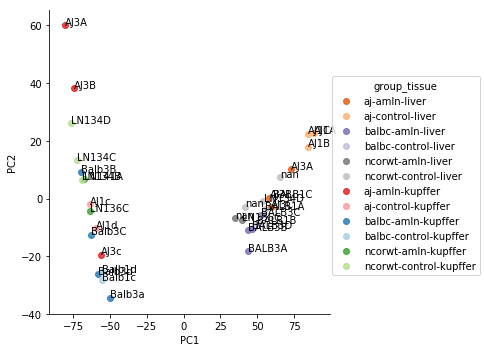

In [10]:
ax = sns.lmplot('PC1', 'PC2', tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)
label_point(tpm_pca_df.PC1, tpm_pca_df.PC2, tpm_pca_df.mouse, plt.gca())

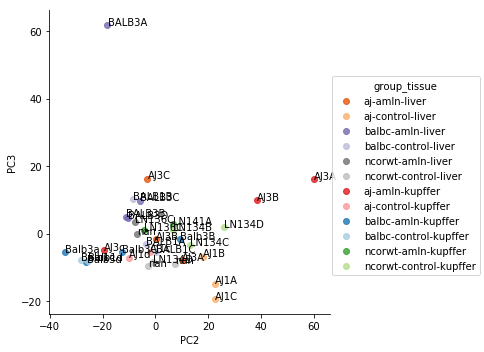

In [11]:
ax = sns.lmplot('PC2', 'PC3', tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)
label_point(tpm_pca_df.PC2, tpm_pca_df.PC3, tpm_pca_df.mouse, plt.gca())

### Consider implementing a 3D plot below
____
**TBD**

## Tissue specific PCA

In [12]:
def df_col_subset(x, id_str):
    import pandas as pd
    import re
    '''Returns pandas dataframe with only columns containing id_str'''
    return x[x.columns[pd.Series(x.columns).str.contains(id_str, flags=re.IGNORECASE)]]

### Whole Liver

In [13]:
# standardize matrix, mean=0, std=1
l_tpm = hbUtils.df_col_subset(tpm_mat, 'Liver')
l_tpm_std = StandardScaler().fit_transform(l_tpm) # scale data
# run PCA
l_pca = PCA(n_components=3)
l_tpm_pca = l_pca.fit_transform(l_tpm_std.T)
#create df for plotting
l_tpm_pca_df = pd.DataFrame(l_tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF[samplesDF.sample_type=='liver'].group_tissue,
                        samplesDF[samplesDF.sample_type=='liver'].subject])).reset_index()
l_tpm_pca_df['mouse'] = l_tpm_pca_df.subject.str.split('_|-').str[6]

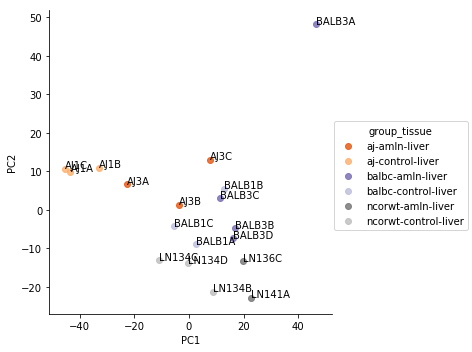

In [14]:
ax = sns.lmplot('PC1', 'PC2', l_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
label_point(l_tpm_pca_df.PC1, l_tpm_pca_df.PC2, l_tpm_pca_df.mouse, plt.gca())

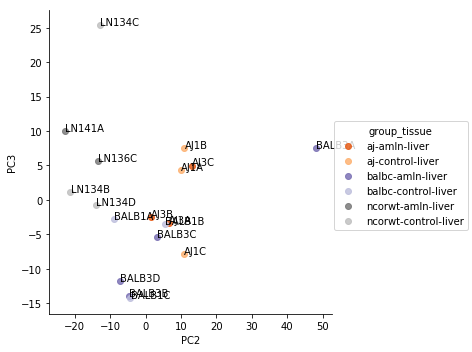

In [15]:
ax = sns.lmplot('PC2', 'PC3', l_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
label_point(l_tpm_pca_df.PC2, l_tpm_pca_df.PC3, l_tpm_pca_df.mouse, plt.gca())

#### From these studies BALB3A appears to be an outlier in the whole liver sample
_____
The mouse was noted to have splenomegaly upon liver isolation and processing. Since we have three balbc amln samples we should probably just exclude this sample from further downstream analysis (for both Kupffer and Liver)

### Kupffer Cells

In [16]:
# standardize matrix, mean=0, std=1
k_tpm = hbUtils.df_col_subset(tpm_mat, 'Kupffer')
k_tpm_std = StandardScaler().fit_transform(k_tpm) # scale data
# run PCA
l_pca = PCA(n_components=3)
k_tpm_pca = l_pca.fit_transform(k_tpm_std.T)
#create df for plotting
k_tpm_pca_df = pd.DataFrame(k_tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=([samplesDF[samplesDF.sample_type=='kupffer'].group_tissue,
                        samplesDF[samplesDF.sample_type=='kupffer'].subject])).reset_index()
k_tpm_pca_df['mouse'] = k_tpm_pca_df.subject.str.split('_|-').str[6]

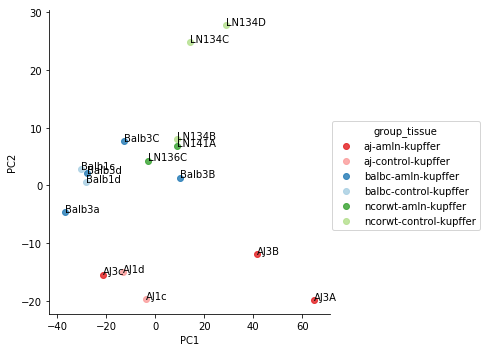

In [17]:
ax = sns.lmplot('PC1', 'PC2', k_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
label_point(k_tpm_pca_df.PC1, k_tpm_pca_df.PC2, k_tpm_pca_df.mouse, plt.gca())

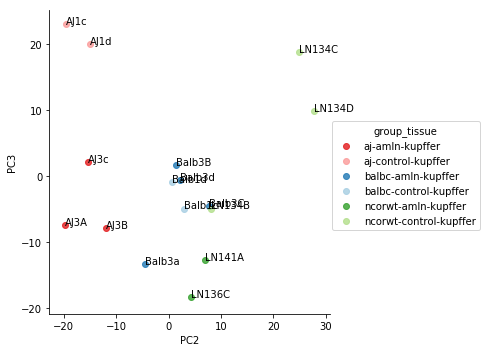

In [18]:
ax = sns.lmplot('PC2', 'PC3', k_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)
label_point(k_tpm_pca_df.PC2, k_tpm_pca_df.PC3, k_tpm_pca_df.mouse, plt.gca())

### Heirachal clustering of samples

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


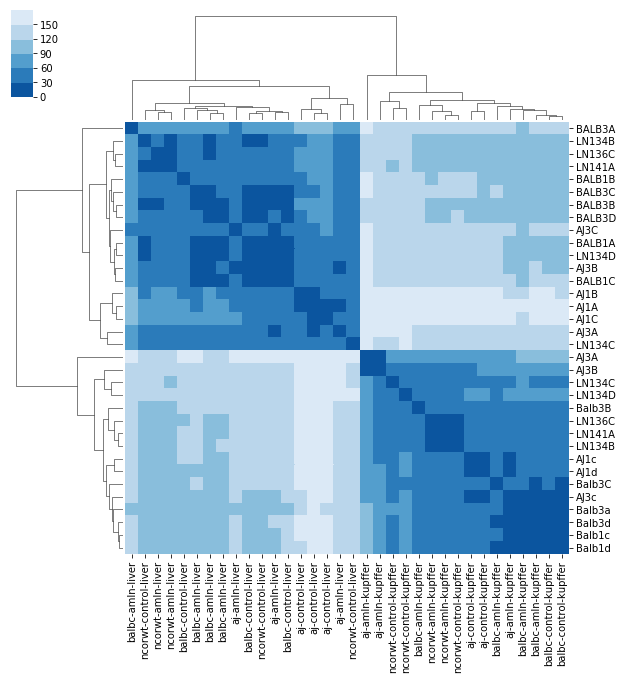

In [19]:
samplesDF['mouse'] = samplesDF.subject.str.split('_|-').str[6]
# calculate euclidean distance between samples
from scipy.spatial import distance
tpm_dist = pd.DataFrame(distance.squareform(distance.pdist(tpm_std.T, 'euclidean')),
                        columns = list(samplesDF.group_tissue),
                        index = list(samplesDF.mouse))
# plot values using sns clustermap - ignore error as we know we are putting in a distance mat
g = sns.clustermap(tpm_dist, cmap=sns.color_palette("Blues_r"))

## Differential Analysis (DESeq2)

Prep data for importing into R

In [20]:
# import the raw count file
raw_counts_file = '/rnaseq_matrix_genes_raw.txt'
counts_df = pd.read_csv(outdir + raw_counts_file, sep='\t')

# drop samples that need to be excluded
to_drop = pd.Series(counts_df.columns).str.contains(
        '|'.join(samplesDF.subject[samplesDF.exclusion == True]))
to_drop[0] = False
counts_df = counts_df.loc[:, list(~to_drop)]
counts_df.head()

# create gene name column
counts_df['Gene'] = pd.Series([x.split('|')[0] for x in counts_df['Annotation/Divergence']])

# clean up columns
counts_df.columns = pd.Series(counts_df.columns)\
        .str.split(r" \(").str[0]\
        .str.split('/.*/').str[-1]
counts_df = counts_df.set_index('Transcript/RepeatID')

# subset just the samples
counts_mat_l = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'liver'), 'aj|balb|ncor')
counts_mat_k = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'kupffer'), 'aj|balb|ncor')

#### Write the data for DESeq2

Liver

In [21]:
# Liver
# raw count matrix for DESeq
liver_raw_counts_file = raw_counts_file.replace('.txt', '_liver_mat_deseq.txt')                                    
if not os.path.isfile(outdir + liver_raw_counts_file):
    counts_mat_l.to_csv(outdir + liver_raw_counts_file, sep='\t')
    
# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_l = samplesDF.loc[(samplesDF.sample_type=='liver') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_l = col_data_l.set_index('subject')
liver_col_file = raw_counts_file.replace('.txt', 'liver_col_info.txt')
if not os.path.isfile(outdir + liver_col_file):
    col_data_l.to_csv(outdir + liver_col_file, sep='\t')

Kupffer cells

In [22]:
# raw count matrix for DESeq
kupffer_raw_counts_file = raw_counts_file.replace('.txt', '_kupffer_mat_deseq.txt')                                   
if not os.path.isfile(outdir + kupffer_raw_counts_file):
    counts_mat_l.to_csv(outdir + kupffer_raw_counts_file, sep='\t')

# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_k = samplesDF.loc[(samplesDF.sample_type=='kupffer') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_k = col_data_k.set_index('subject')
kupffer_col_file = raw_counts_file.replace('.txt', 'kupffer_col_info.txt')
if not os.path.isfile(outdir + kupffer_col_file):
    col_data_k.to_csv(outdir + kupffer_col_file, sep='\t')

### Analyze Kupffer Cell Data

#### First lets try and figure out what model we should use. DESeq has the ability to model interaction terms between the strain and diet, however this would make for a fairly complicated downstream analysis.
____
To try and figure out how to analyze this data lets use the likelihood ratio test in DESeq to assess the differences in dispersions between the fitted count data (one version fitted with the full model, one with reduced). This should give us a gene by gene assessment of how well the model explains the data compared to a simpler null.

In [153]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# adjust factors to ensure that we are comparing amln to control
dds$diet <- factor(dds$diet, levels = c('control', 'amln'))
dds$strain <- factor(dds$strain, levels = c('ncorwt', 'balbc', 'aj'))


# run DESeq LRT to assess effect of strains on diet
dds <- DESeq(dds, test="LRT", reduced= ~ strain + diet)
res <- results(dds, alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/lrt_strainsdiet_interaction_deseq_results.txt"))

#### First lets try and figure out what model we should use. DESeq has the ability to model interaction terms between the strain and diet, however this would make for a fairly complicated downstream analysis.
____
To try and figure out how to analyze this data lets use the likelihood ratio test in DESeq to assess the differences in dispersions between the fitted count data (one version fitted with the full model, one with reduced). This should give us a gene by gene assessment of how well the model explains the data compared to a simpler null.

### assess effect of interaction term

In [23]:
intx = pd.read_csv(outdir + "/lrt_strainsdiet_interaction_deseq_results.txt")

In [24]:
(intx.padj <= 0.01).value_counts()

False    35554
True       191
Name: padj, dtype: int64

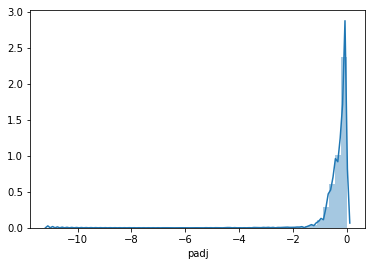

In [25]:
sns.distplot(np.log10(intx.padj.dropna()))

** We see above that 191 genes pass the padj (BH FDR) < 0.1 cutoff as being better fit by the interaction term model. This merits further follow up... **


#### Run DESeq2 with interaction model
____
This is following the DESeq manual for how to model interactions. See online documentation or enter '?results' in R with DESeq2 package loaded.

In [26]:
%%R -i counts_mat_k,col_data_k
# load DESeq
library("DESeq2")

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# adjust factors to ensure that we are comparing amln to control
dds$diet <- factor(dds$diet, levels = c('control', 'amln'))
dds$strain <- factor(dds$strain, levels = c('ncorwt', 'balbc', 'aj'))

# run DESeq with full model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'amln', 'control'), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_deseq_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainbalbc.dietamln') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_deseq_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainaj.dietamln') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_deseq_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietamln', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_amln_interaction_deseq_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietamln', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_amln_interaction_deseq_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietamln", "strainaj.dietamln"), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_amln_interaction_deseq_results.txt"))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: S4Vectors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rp

KeyboardInterrupt: 


Error in paste0(outdir, "/ncorwt_amln_deseq_results.txt") : 
  object 'outdir' not found


/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: converting counts to integer mode

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: it appears that the last variable in the design formula, 'diet',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating size factors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating dispersions

  warnings.warn(x, 

### BALBC differentially regulated genes

In [26]:
def intersect(list1, list2):
    return list(set(list1) & set(list2))

In [27]:
balb_amln = pd.read_csv(outdir + "/balbc_amln_deseq_results.txt")
balb_aj = pd.read_csv(outdir + "/balbc_aj_amln_interaction_deseq_results.txt")
balb_ncor = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_deseq_results.txt")

In [28]:
# combine into one DF
balb = balb_amln.merge(balb_aj.merge(balb_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

Next, to start analyzing this data, we will ask how many of the differentially induced genes in balbc by the amln diet are also differentially induced in balb compared to aj

In [29]:
balb_aj_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_aj <= 0.05))
balb_aj_spec.value_counts()

False    35726
True        19
dtype: int64

In [30]:
balb_ncor_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_ncor <= 0.05))
balb_ncor_spec.value_counts()

False    35511
True       234
dtype: int64

In [31]:
((balb_aj_spec) & (balb_ncor_spec)).value_counts()

False    35726
True        19
dtype: int64

^ thus all 19 of the balb/aj specific genes are balb ncor specific genes

In [32]:
balb_spec_refseq = balb.loc[((balb_aj_spec) & (balb_ncor_spec)), 'Unnamed: 0']

Lets plot their expression...

In [33]:
# load in rpkm file without adjustments
rpkm_genes_raw = pd.read_csv(outdir + '/rnaseq_matrix_genes_rpkm.txt', sep='\t')

# drop the balb3A columns
to_drop = pd.Series(rpkm_genes_raw.columns).str.contains(
        '|'.join(samplesDF.subject[samplesDF.exclusion == True]))
to_drop[0] = False
rpkm_genes_raw = rpkm_genes_raw.loc[:, list(~to_drop)]

# generate tissue specific rpkm files for plotting
rpkm_genes_raw_k= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Kupffer.*')
rpkm_genes_raw_l= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Liver.*')

In [34]:
balb_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(balb_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

### Kupffer Cell Expression of Balbc specific genes

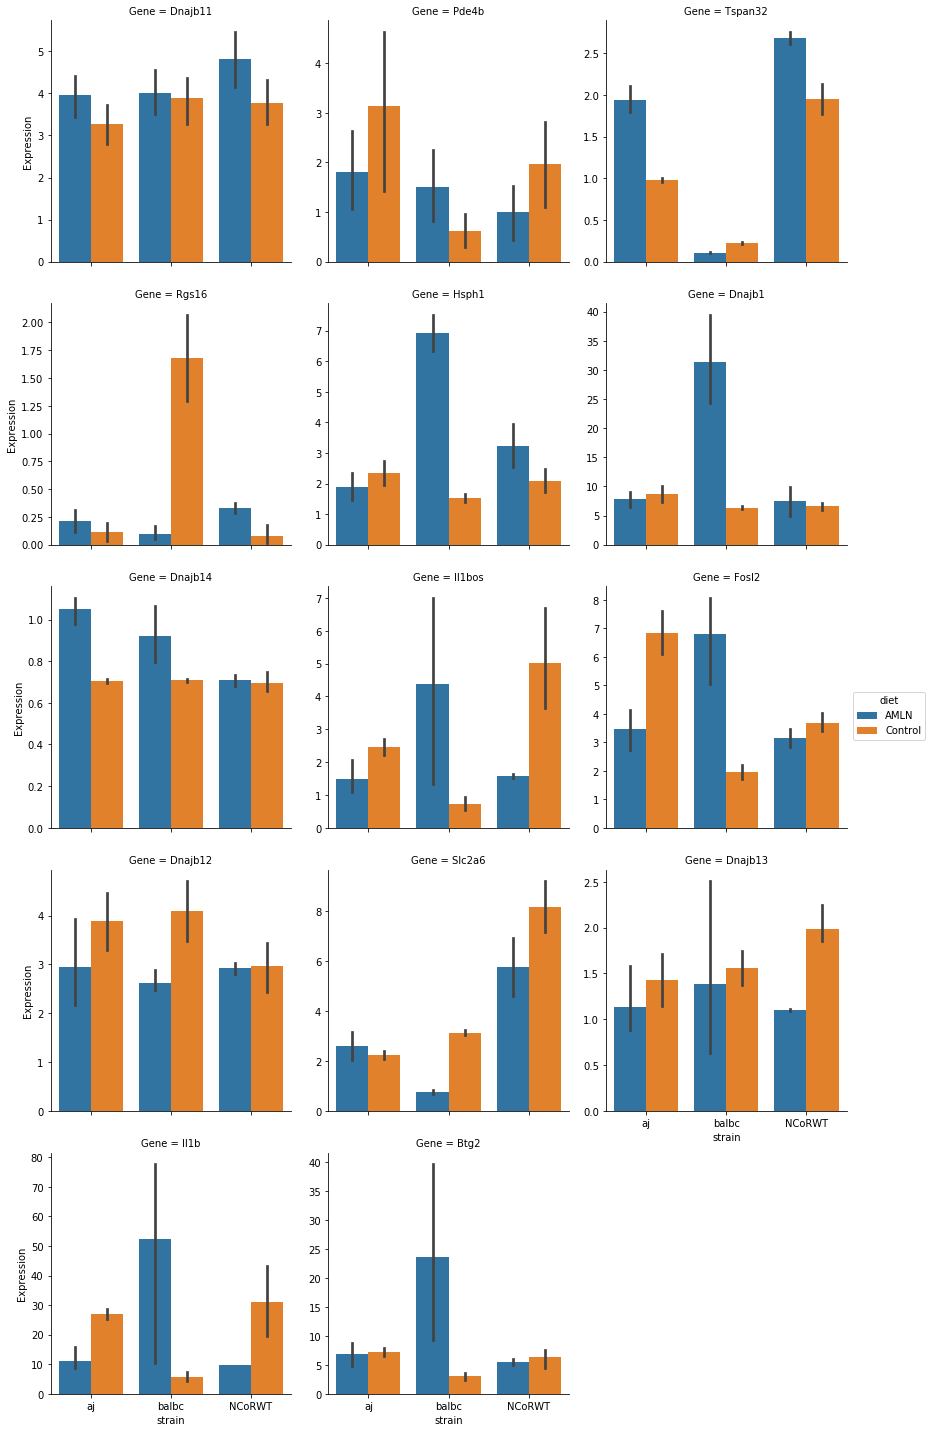

In [36]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + balb_spec_genes))

### Whole Liver Expression of Balbc specific genes

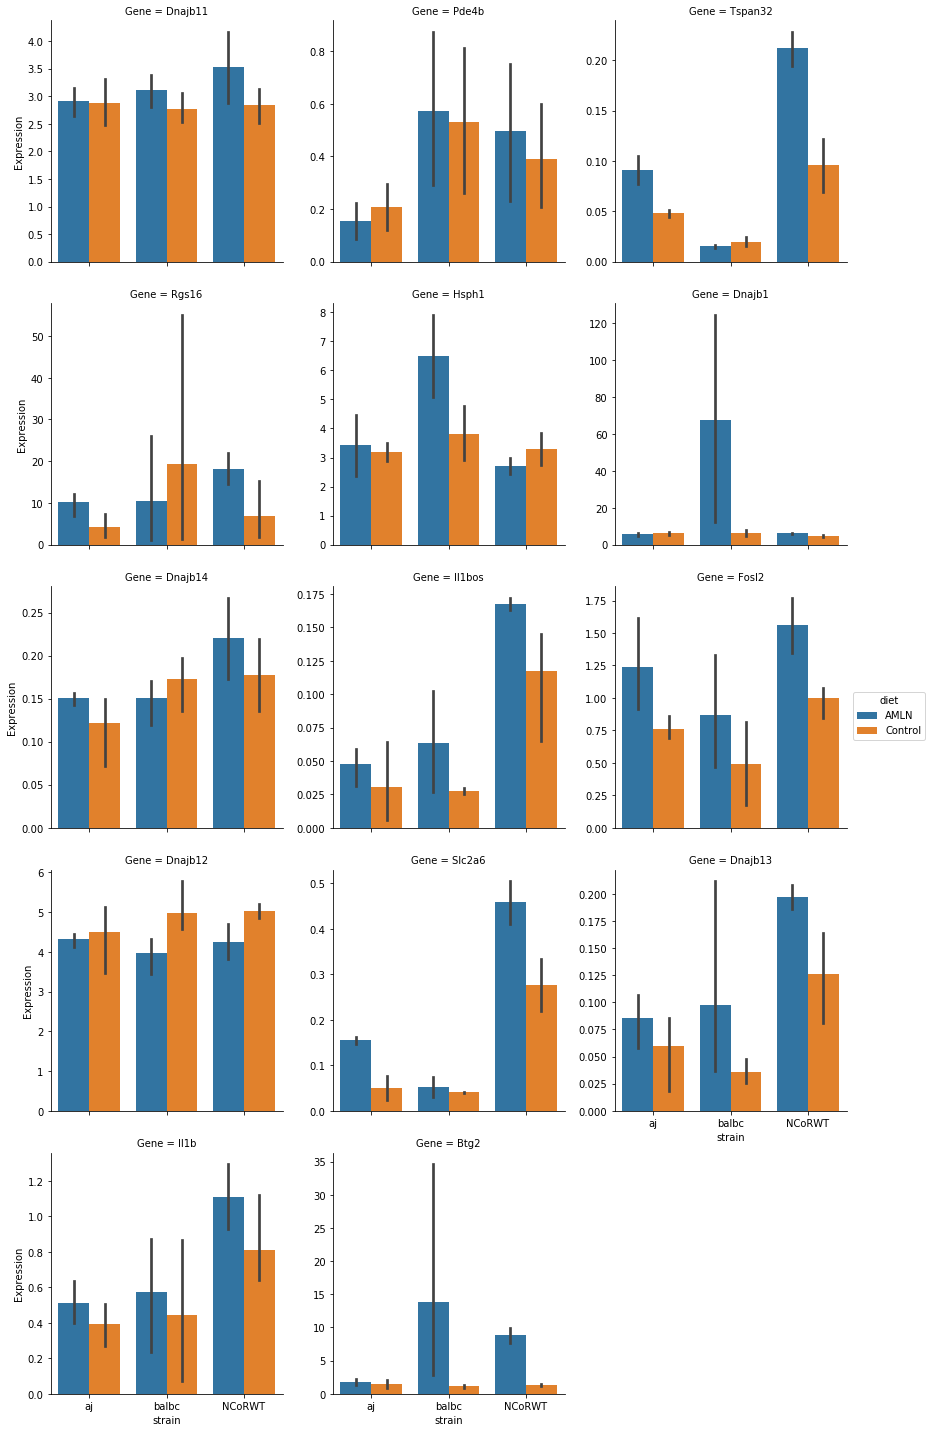

In [37]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + balb_spec_genes))

Unclear how to exactly interpret the above gene expression differences. interesting that the inflammatory gene Il1b would be increased in balb given that they do not have the inflammatory phenotype that we see in the other mice livers.  
**Jason wants to see if these genes are conserved in the strain specific response to CCl4.**

### AJ differentially regulated genes

In [38]:
aj_amln = pd.read_csv(outdir + "/aj_amln_deseq_results.txt")
aj_balb = pd.read_csv(outdir + "/balbc_aj_amln_interaction_deseq_results.txt")
aj_ncor = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_deseq_results.txt")

In [39]:
# combine into one DF
aj = aj_amln.merge(aj_balb.merge(aj_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

In [40]:
aj_balb_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_balb <= 0.05))
aj_balb_spec.value_counts()

False    35734
True        11
dtype: int64

In [41]:
aj_ncor_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_ncor <= 0.05))
aj_ncor_spec.value_counts()

False    35734
True        11
dtype: int64

Since there is only one specific gene that is different in aj than both balb and ncor (serpinb8), lets look at all the genes that display a different response to AMLN between aj and balb OR ncor.

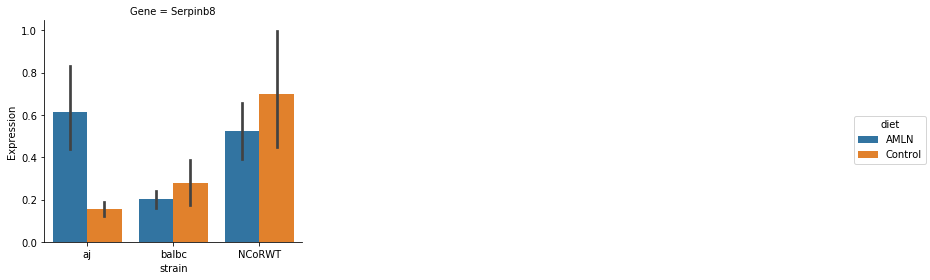

In [42]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '^serpinb8')

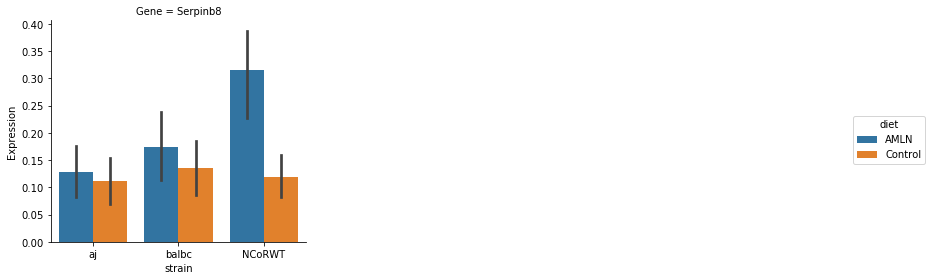

In [43]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '^serpinb8')

In [44]:
# aj specific refseq ids
aj_spec_refseq = aj.loc[((aj_balb_spec) | (aj_ncor_spec)), 'Unnamed: 0']

# Get aj spec gene names
aj_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(aj_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

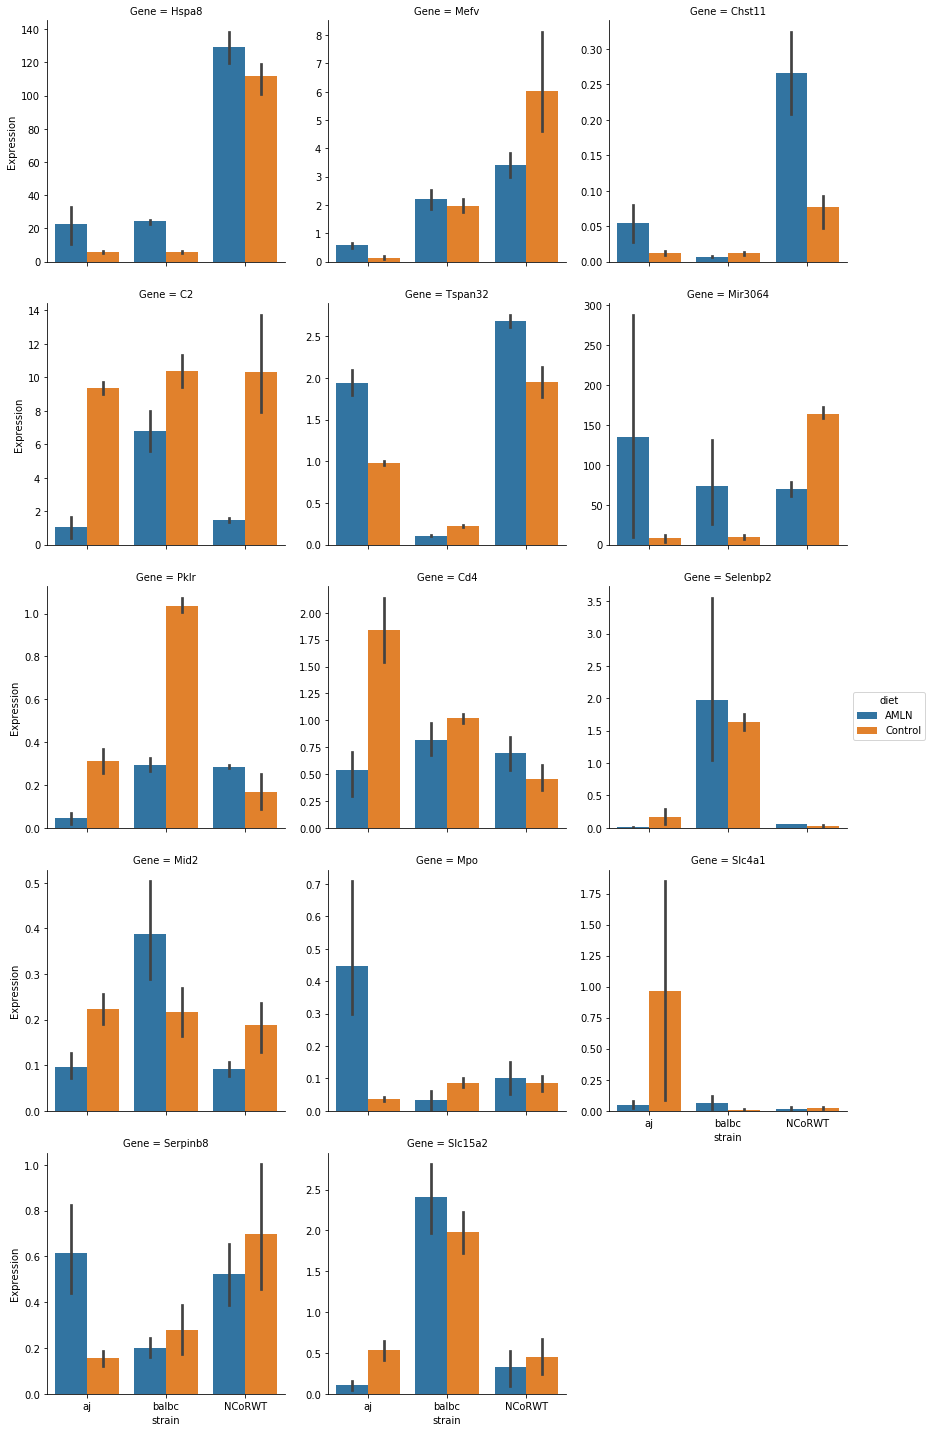

In [45]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + aj_spec_genes + '\|'))

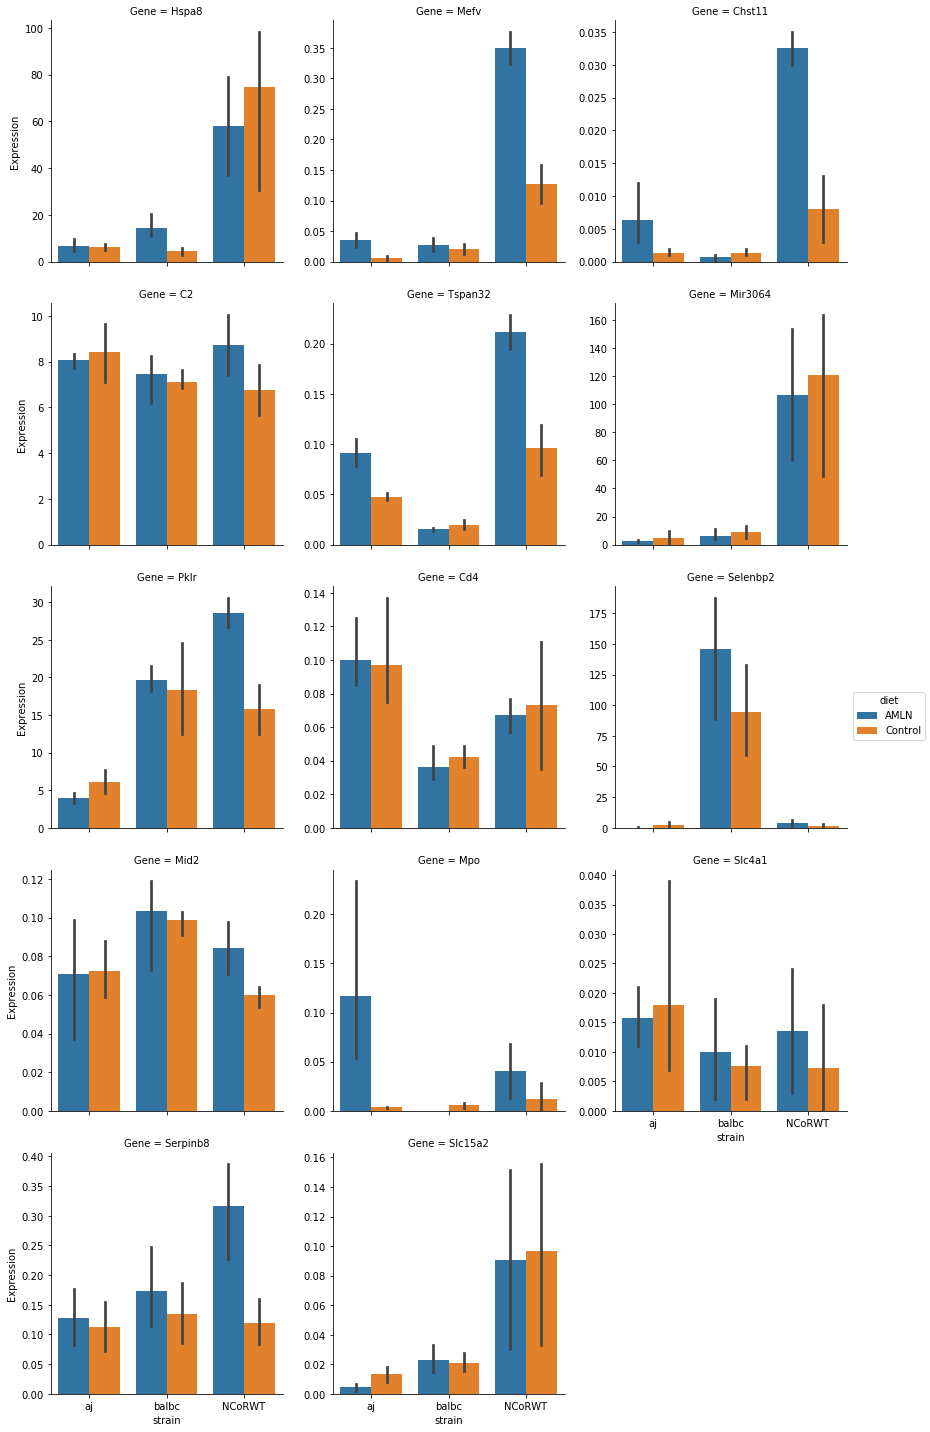

In [46]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + aj_spec_genes + '\|'))

### NCoRWT (C57/BL6) differentially regulated genes

In [47]:
ncorwt_amln = pd.read_csv(outdir + "/ncorwt_amln_deseq_results.txt")
ncorwt_aj = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_deseq_results.txt")
ncorwt_balb = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_deseq_results.txt")

In [48]:
# combine into one DF
ncorwt = ncorwt_amln.merge(ncorwt_balb.merge(ncorwt_aj, how='outer', on='Unnamed: 0',
                                             suffixes=('_ncorwt_balb', '_ncorwt_aj')),
                           how='outer', on='Unnamed: 0')

In [49]:
ncorwt_balb_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_balb <= 0.05))
ncorwt_balb_spec.value_counts()

False    35490
True       255
dtype: int64

In [50]:
ncorwt_aj_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_aj <= 0.05))
ncorwt_aj_spec.value_counts()

False    35645
True       100
dtype: int64

In [51]:
(ncorwt_aj_spec & ncorwt_balb_spec).value_counts()

False    35664
True        81
dtype: int64

In [52]:
# ncorwt specific refseq ids
ncorwt_spec_refseq = ncorwt.loc[((ncorwt_balb_spec) & (ncorwt_aj_spec)), 'Unnamed: 0']

# Get ncorwt spec gene names
ncorwt_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(ncorwt_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

#### Kupffer cell expression

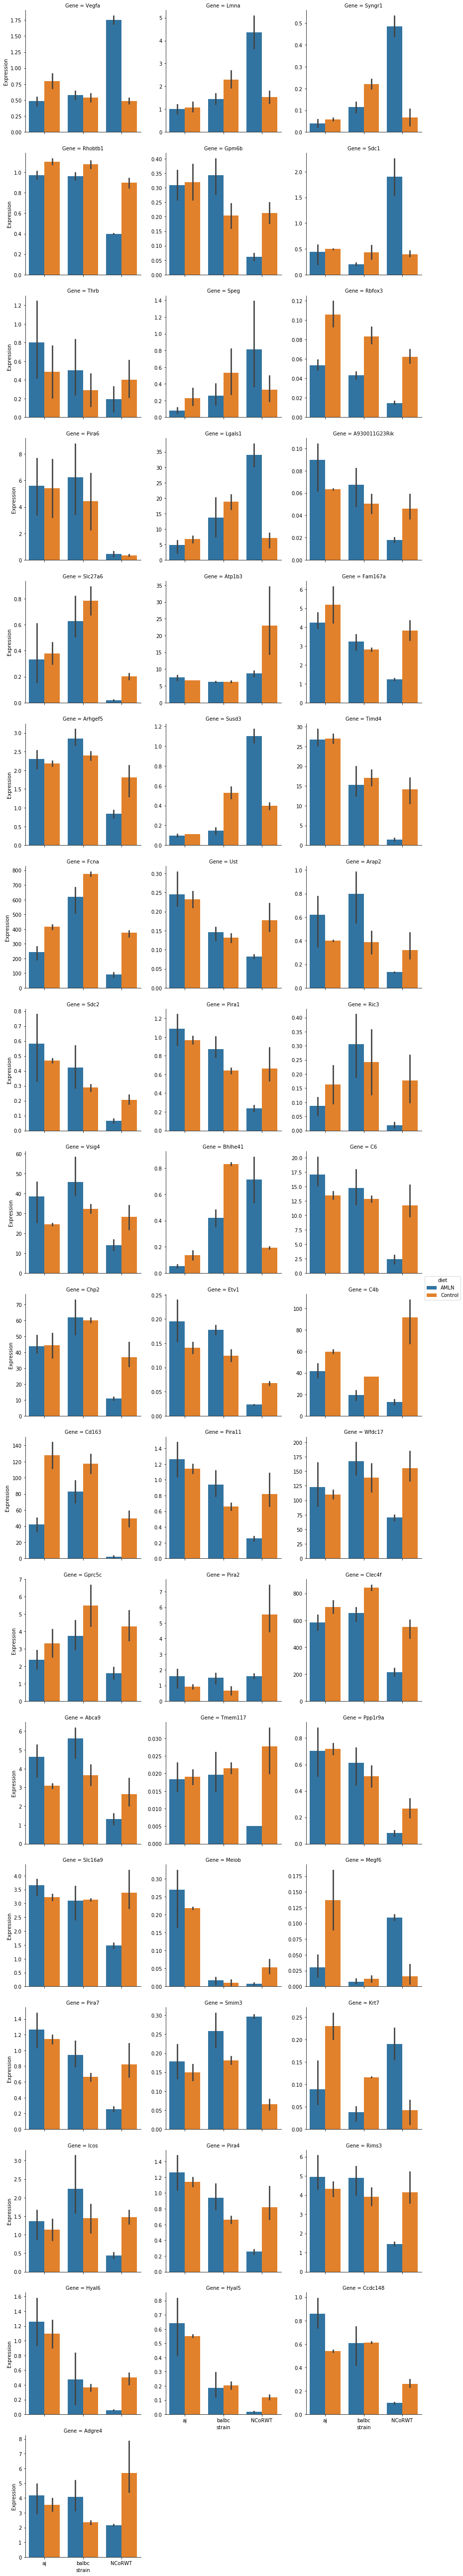

In [53]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + ncorwt_spec_genes + '\|'))

#### liver expression


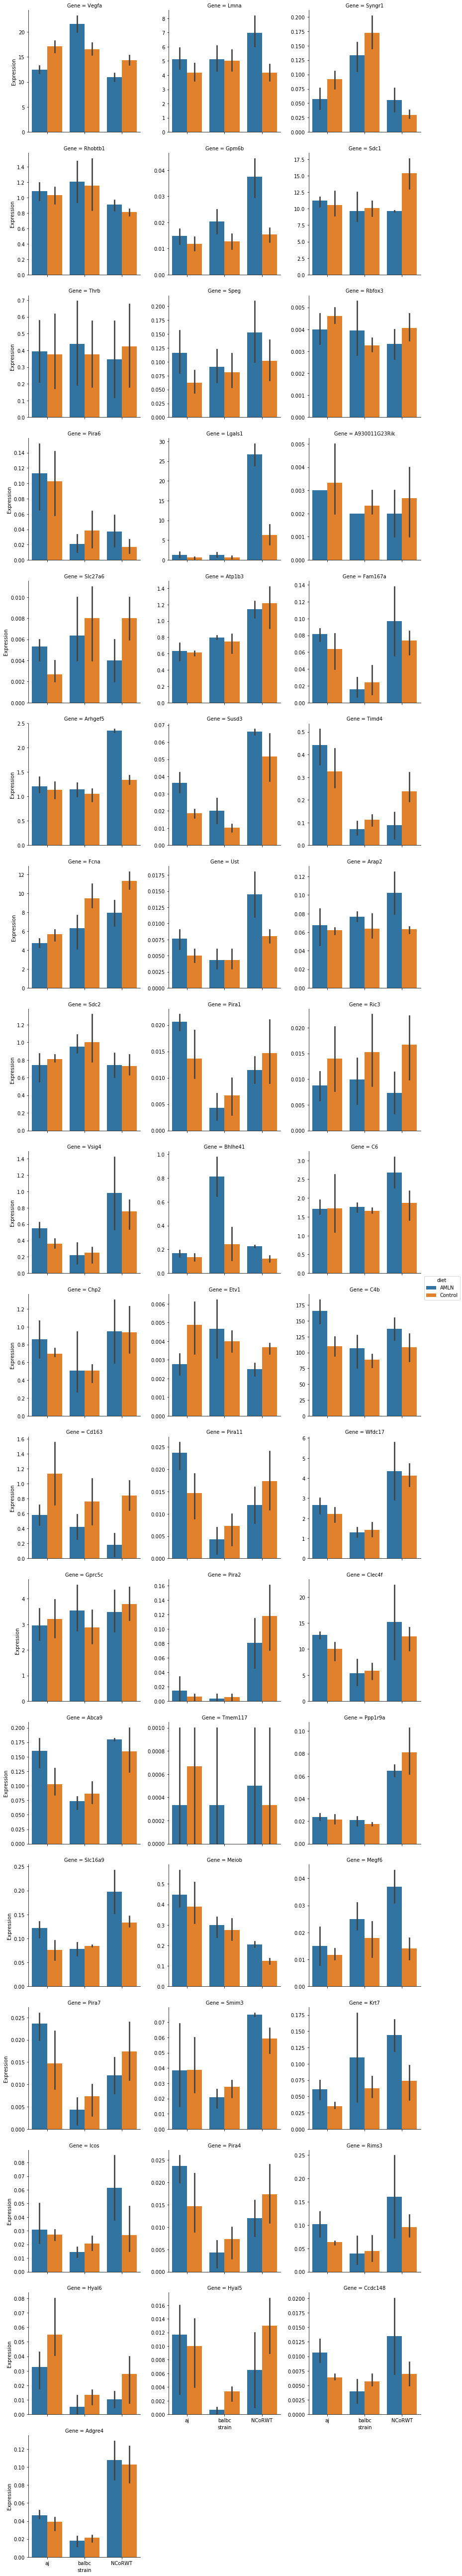

In [54]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + ncorwt_spec_genes + '\|'))

## Analyze Whole Liver RNA Seq Data 

In [69]:
%%R -i counts_mat_l,col_data_l,outdir
# load DESeq
library("DESeq2")

colnames(counts_mat_l) <- NULL

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_l,
                             colData = col_data_l,
                             design = ~ strain + diet + strain:diet)

# adjust factors to ensure that we are comparing amln to control
dds$diet <- relevel(dds$diet, ref='control')
dds$strain <- relevel(dds$strain, ref='ncorwt')

# run DESeq with full model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'amln', 'control'), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_wholeliver_deseq_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainbalbc.dietamln') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_wholeliver_deseq_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainaj.dietamln') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_wholeliver_deseq_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietamln', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_amln_interaction_wholeliver_deseq_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietamln', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_amln_interaction_wholeliver_deseq_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietamln", "strainaj.dietamln"), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_amln_interaction_wholeliver_deseq_results.txt"))

### Analyze Balbc differential genes in the Whole Liver

In [35]:
balb_amln = pd.read_csv(outdir + "/balbc_amln_wholeliver_deseq_results.txt")
balb_aj = pd.read_csv(outdir + "/balbc_aj_amln_interaction_wholeliver_deseq_results.txt")
balb_ncor = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_wholeliver_deseq_results.txt")

In [36]:
# combine into one DF
balb = balb_amln.merge(balb_aj.merge(balb_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

Next, to start analyzing this data, we will ask how many of the differentially induced genes in balbc by the amln diet are also differentially induced in balb compared to aj

In [37]:
balb_aj_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_aj <= 0.05))
balb_aj_spec.value_counts()

False    35724
True        21
dtype: int64

In [38]:
balb_ncor_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.05) & (balb.padj_balb_ncor <= 0.05))
balb_ncor_spec.value_counts()

False    35723
True        22
dtype: int64

In [39]:
((balb_aj_spec) & (balb_ncor_spec)).value_counts()

False    35736
True         9
dtype: int64

^ thus all 19 of the balb/aj specific genes are balb ncor specific genes

In [40]:
balb_spec_refseq = balb.loc[((balb_aj_spec) & (balb_ncor_spec)), 'Unnamed: 0']

In [41]:
balb_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(balb_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

### Whole Liver Expression of Balbc specific genes

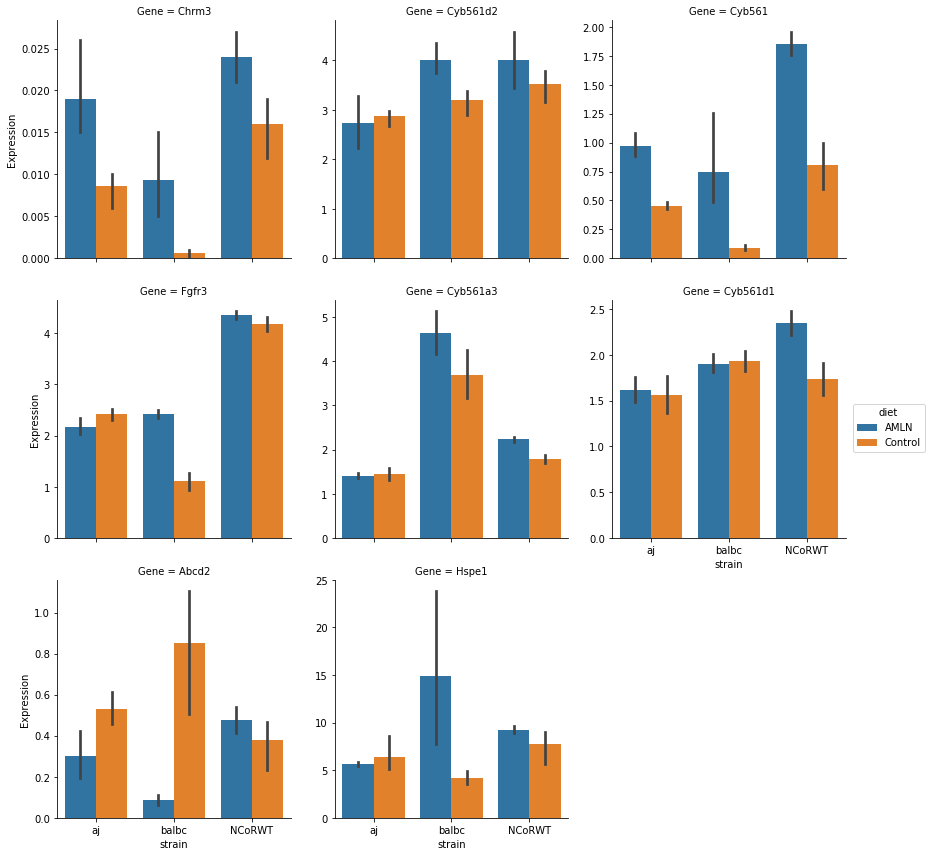

In [42]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + balb_spec_genes))

One of the genes that stands out to me is Hspe1. Hspe1 is strongly induced in balbc, barely increases in NCORWT and decreases in AJ on the NASH diet. it is produced by the mitochondrial unfolded protein response which has been shown to improve NASH when activated. Lets look into this a bit more closely...
This paper's finding serving as a guide: http://onlinelibrary.wiley.com/doi/10.1002/hep.28245/full

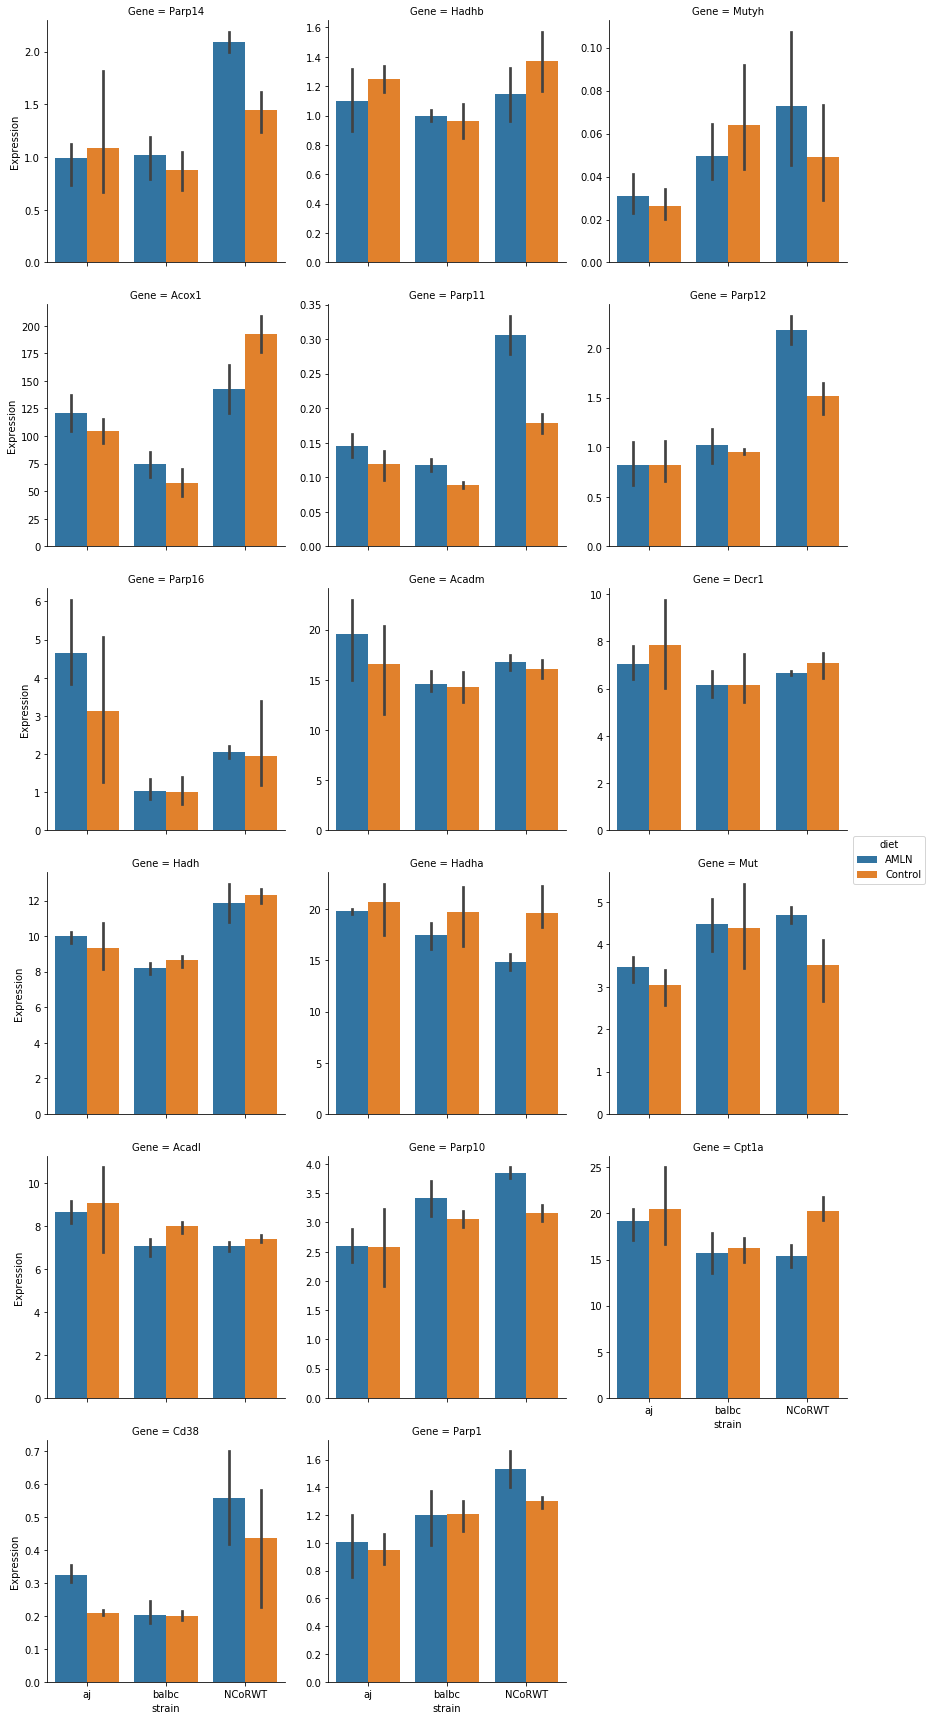

In [129]:
#beta oxidation genes activated by NAD, correlated with better mitochon function
nad_genes = ['CD38', 'PARP1', 'CPT1A', 'MUT', 'ACOX1', 'HADH', 'DECR1', 'ACADM', 'ACADL', 'NRK1', 'NAMPT']
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + pd.Series(nad_genes)) + '\|')

check genes associated with mitochondrial biogenesis

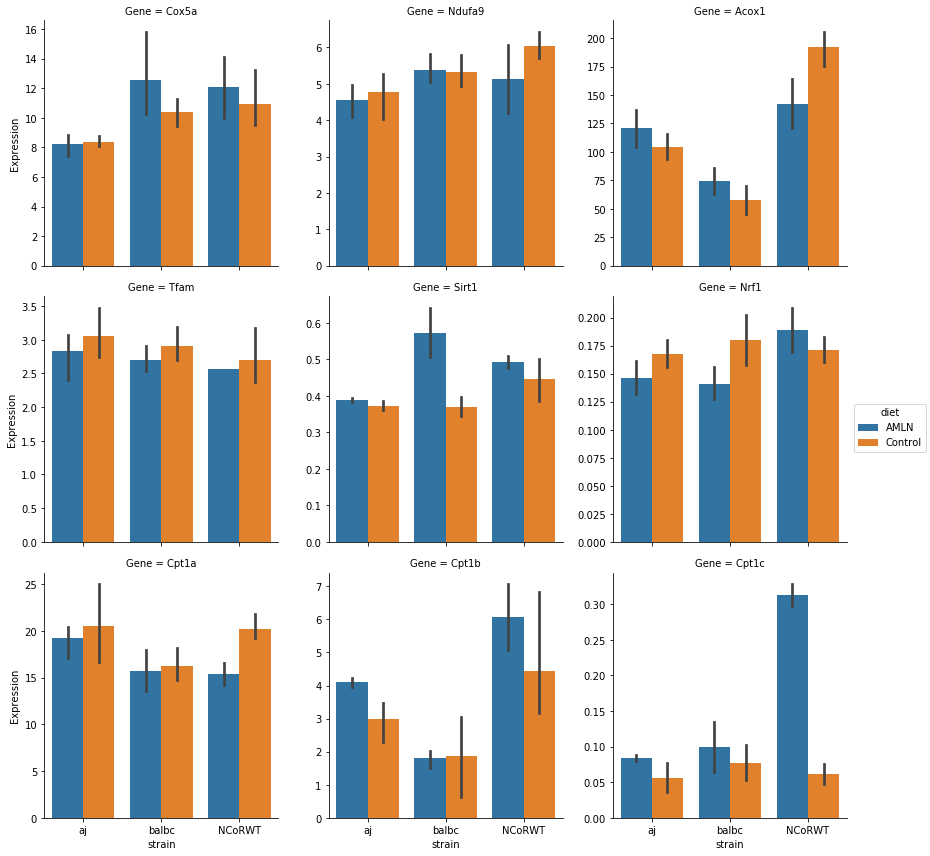

In [105]:
# mitochondrial biogenesis genes
mito_genes = ['Sirt1', 'Nrf1', 'Tfam', 'Ndufa9', 'Cox5a', 'Cpt1', 'Acox1', 'Mcad', 'ACADL']
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + pd.Series(mito_genes)) + '\|')

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


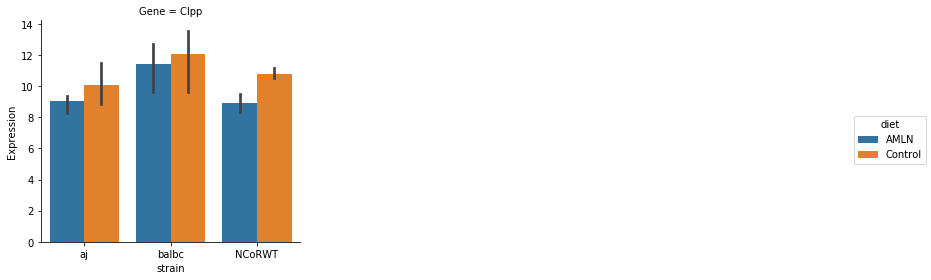

In [107]:
# Look at another mitochondrial unfolded protein response compound -- CLPP
hbUtils.plot_gene_exp(rpkm_genes_raw_l, 'CLPP')

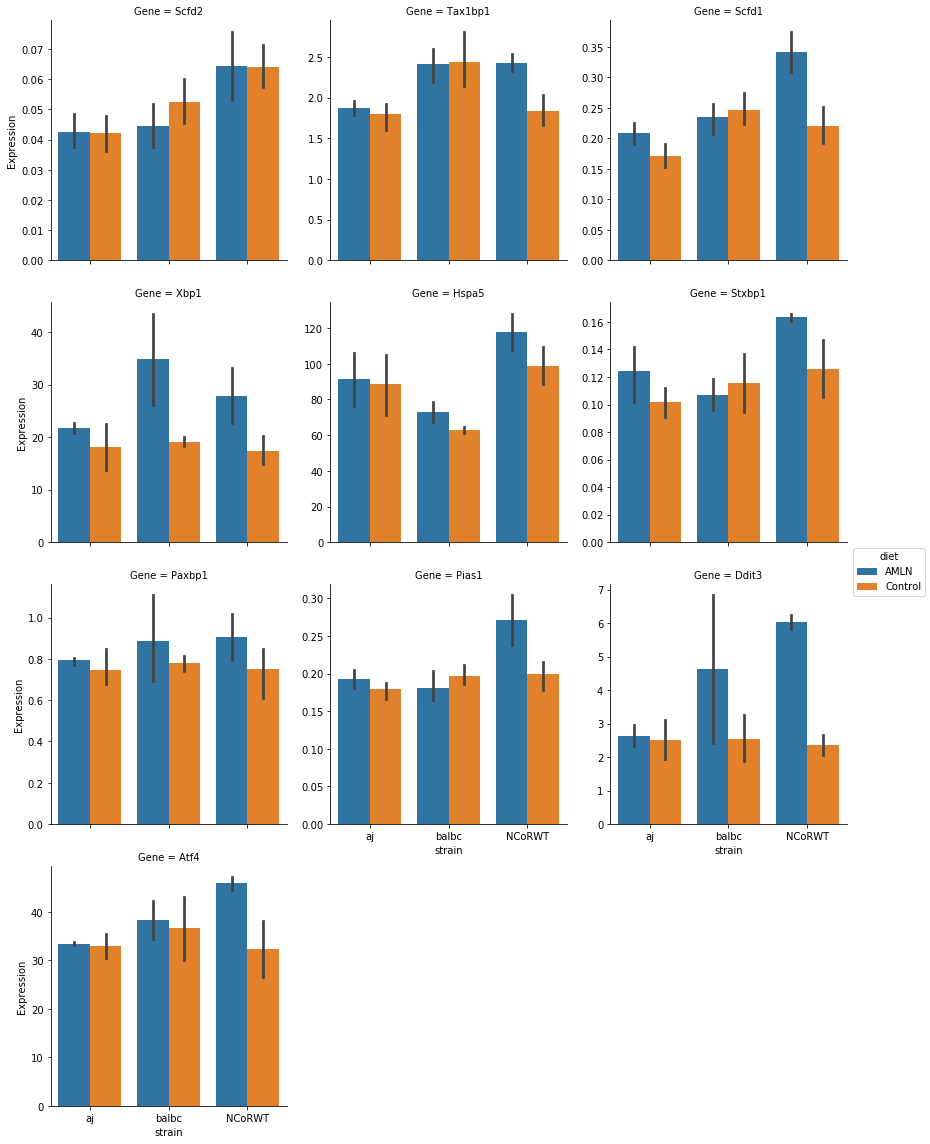

In [43]:
# What about ER Stress?
er_stress = ['Atf4', 'Chop', 'Grp78', 'Xbp1', 'Xbp1']
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join(pd.Series(er_stress)))

In [119]:
# to be thorough lets look at GO term for resp. to ER stress.
endo_stress = pd.DataFrame(hbUtils.pull_go_terms(term = 'GO:0034976',
                                               taxon_id='10090', product_type='protein'))
endo_stress.loc[:, 1].unique()

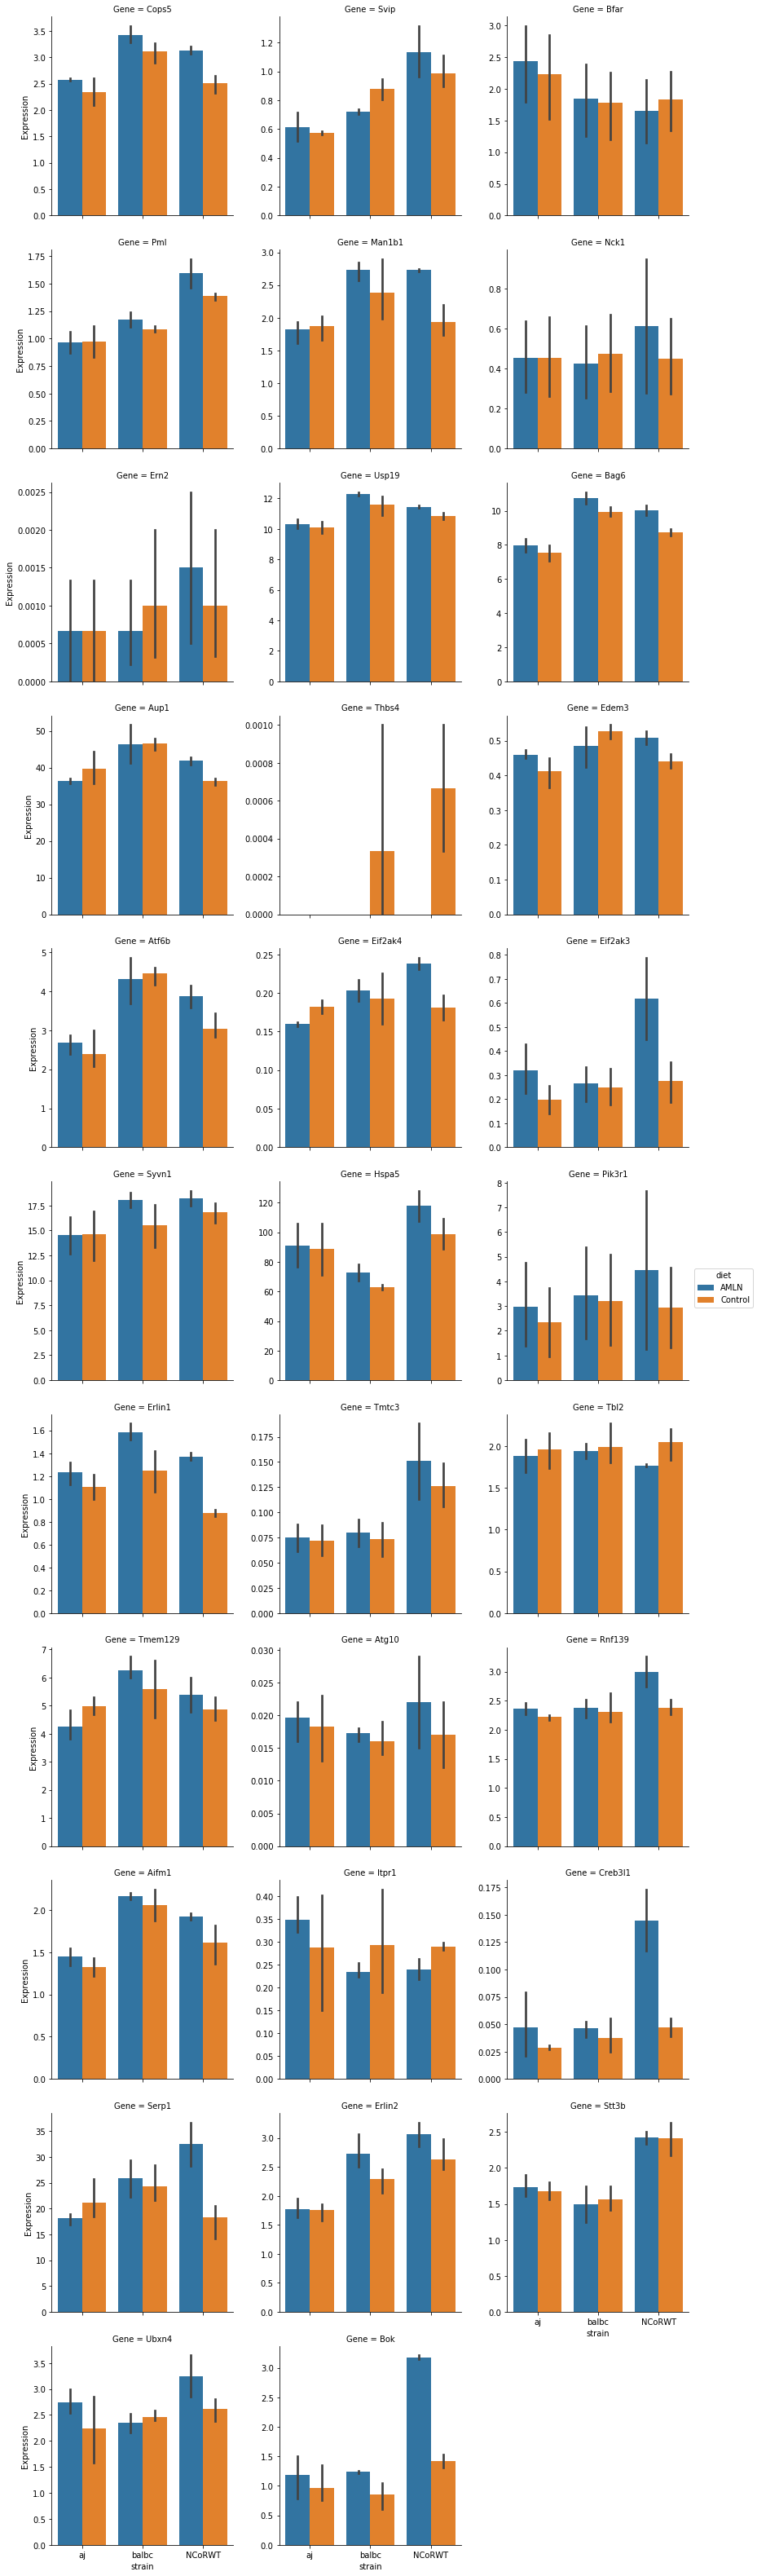

In [131]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + endo_stress.loc[:, 1].unique() + '\|'))

### Kuppfer cell Expression of Balbc Whole liver specific genes

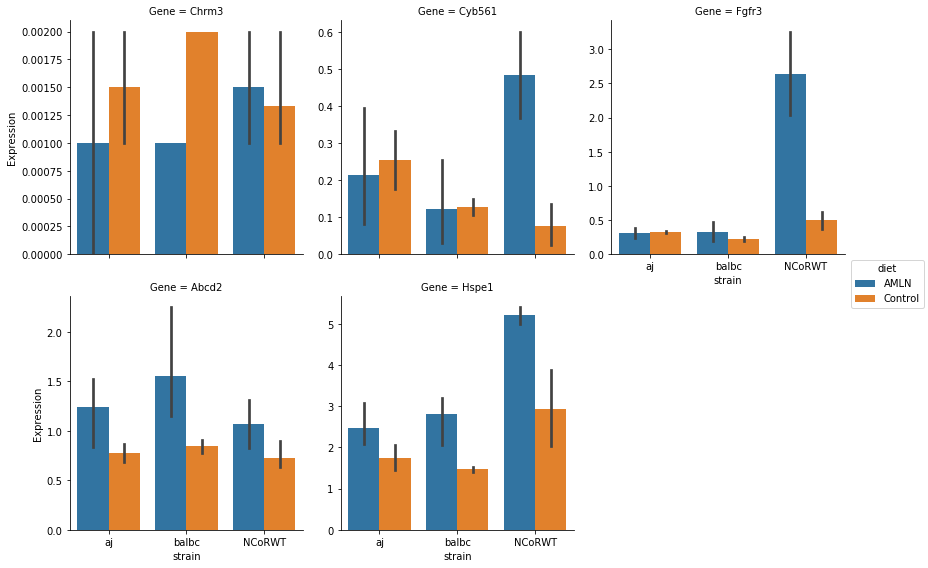

In [47]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + balb_spec_genes + '\|'))

### AJ differentially regulated genes

In [53]:
aj_amln = pd.read_csv(outdir + "/aj_amln_wholeliver_deseq_results.txt")
aj_balb = pd.read_csv(outdir + "/balbc_aj_amln_interaction_wholeliver_deseq_results.txt")
aj_ncor = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_wholeliver_deseq_results.txt")

In [54]:
# combine into one DF
aj = aj_amln.merge(aj_balb.merge(aj_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

In [55]:
aj_balb_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_balb <= 0.05))
aj_balb_spec.value_counts()

False    35734
True        11
dtype: int64

In [56]:
aj_ncor_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.05) & (aj.padj_aj_ncor <= 0.05))
aj_ncor_spec.value_counts()

False    35730
True        15
dtype: int64

In [61]:
((aj_balb_spec) & (aj_ncor_spec)).value_counts()

False    35744
True         1
dtype: int64

In [59]:
# aj specific refseq ids
aj_spec_refseq = aj.loc[((aj_balb_spec) & (aj_ncor_spec)), 'Unnamed: 0']

# Get aj spec gene names
aj_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(aj_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

In [62]:
aj_spec_genes

35207    Cyp2c29
Name: Annotation/Divergence, dtype: object

#### Plot Whole Liver Specific Genes

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


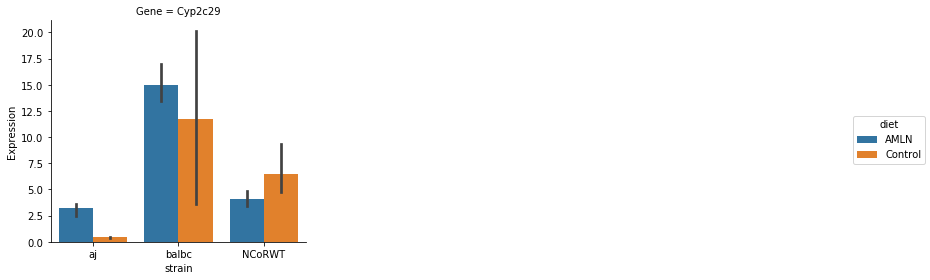

In [66]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + aj_spec_genes))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


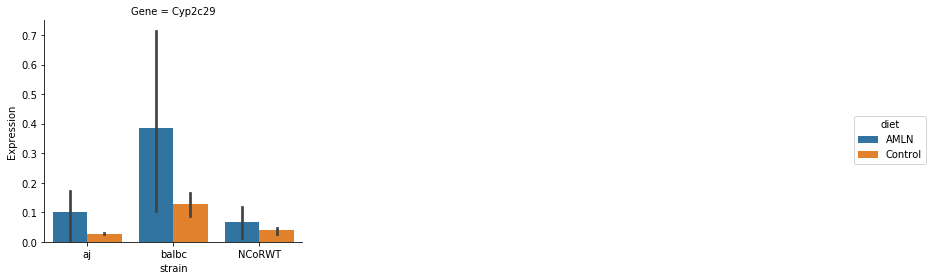

In [65]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + aj_spec_genes))

#### NCoRWT (C57 BL6) specific genes

In [70]:
ncorwt_amln = pd.read_csv(outdir + "/ncorwt_amln_wholeliver_deseq_results.txt")
ncorwt_aj = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_wholeliver_deseq_results.txt")
ncorwt_balb = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_wholeliver_deseq_results.txt")

In [71]:
# combine into one DF
ncorwt = ncorwt_amln.merge(ncorwt_balb.merge(ncorwt_aj, how='outer', on='Unnamed: 0',
                                             suffixes=('_ncorwt_balb', '_ncorwt_aj')), 
                           how='outer', on='Unnamed: 0')

In [72]:
ncorwt_balb_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_balb <= 0.05))
ncorwt_balb_spec.value_counts()

False    35573
True       172
dtype: int64

In [73]:
ncorwt_aj_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.05) & (ncorwt.padj_ncorwt_aj <= 0.05))
ncorwt_aj_spec.value_counts()

False    35639
True       106
dtype: int64

In [74]:
(ncorwt_aj_spec & ncorwt_balb_spec).value_counts()

False    35675
True        70
dtype: int64

In [75]:
# ncorwt specific refseq ids
ncorwt_spec_refseq = ncorwt.loc[((ncorwt_balb_spec) & (ncorwt_aj_spec)), 'Unnamed: 0']

# Get ncorwt spec gene names
ncorwt_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(ncorwt_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

#### Kupffer cell expression

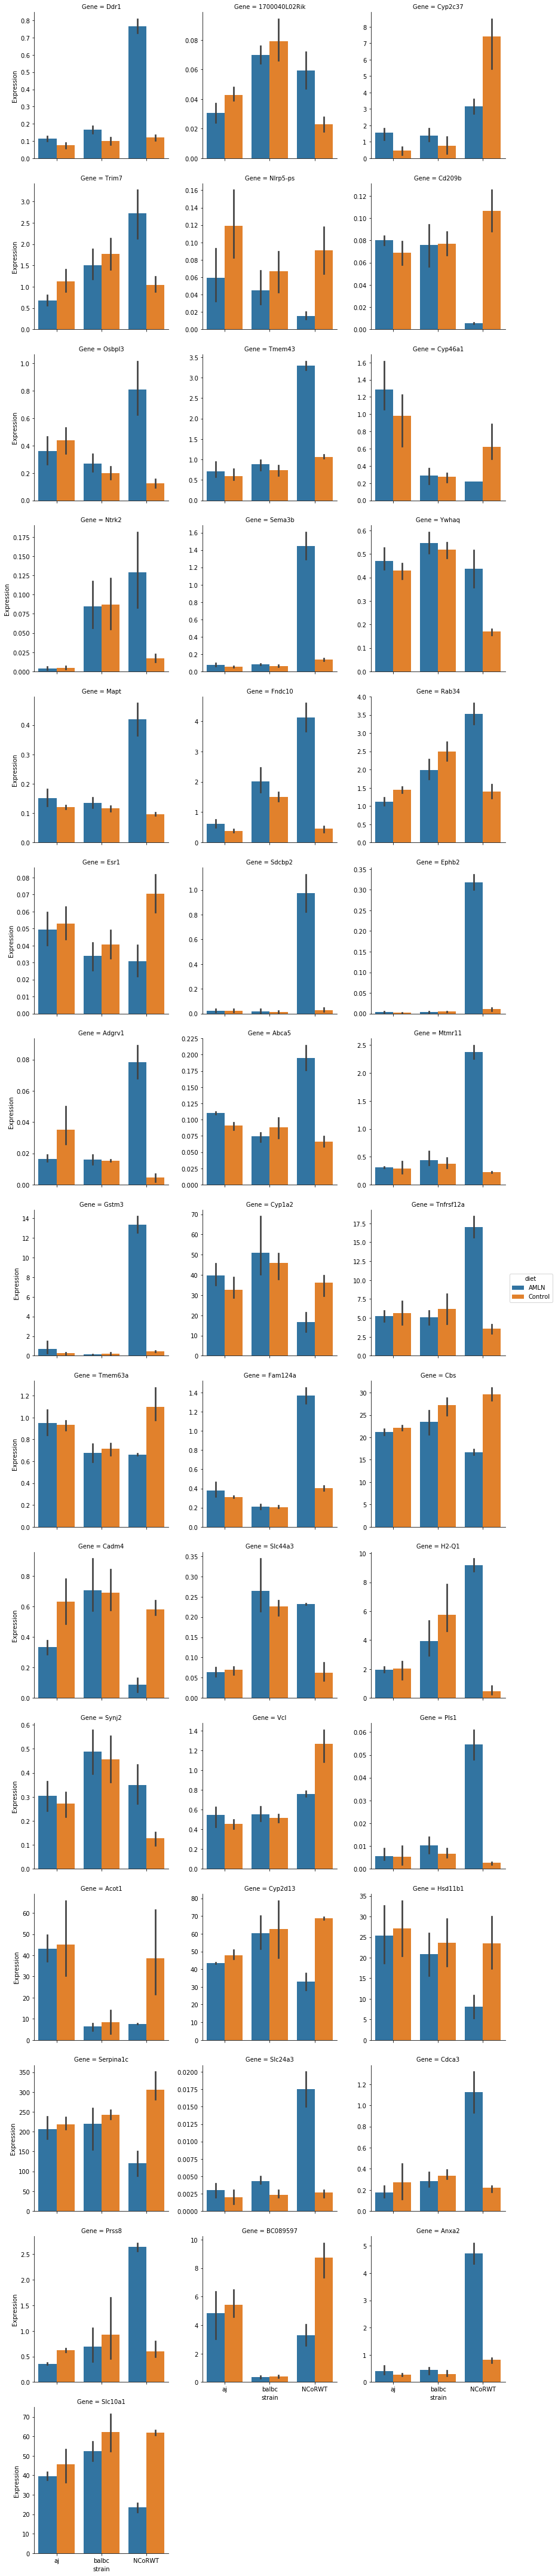

In [77]:
hbUtils.plot_gene_exp(rpkm_genes_raw_l, '|'.join('^' + ncorwt_spec_genes + '\|'))

#### liver expression


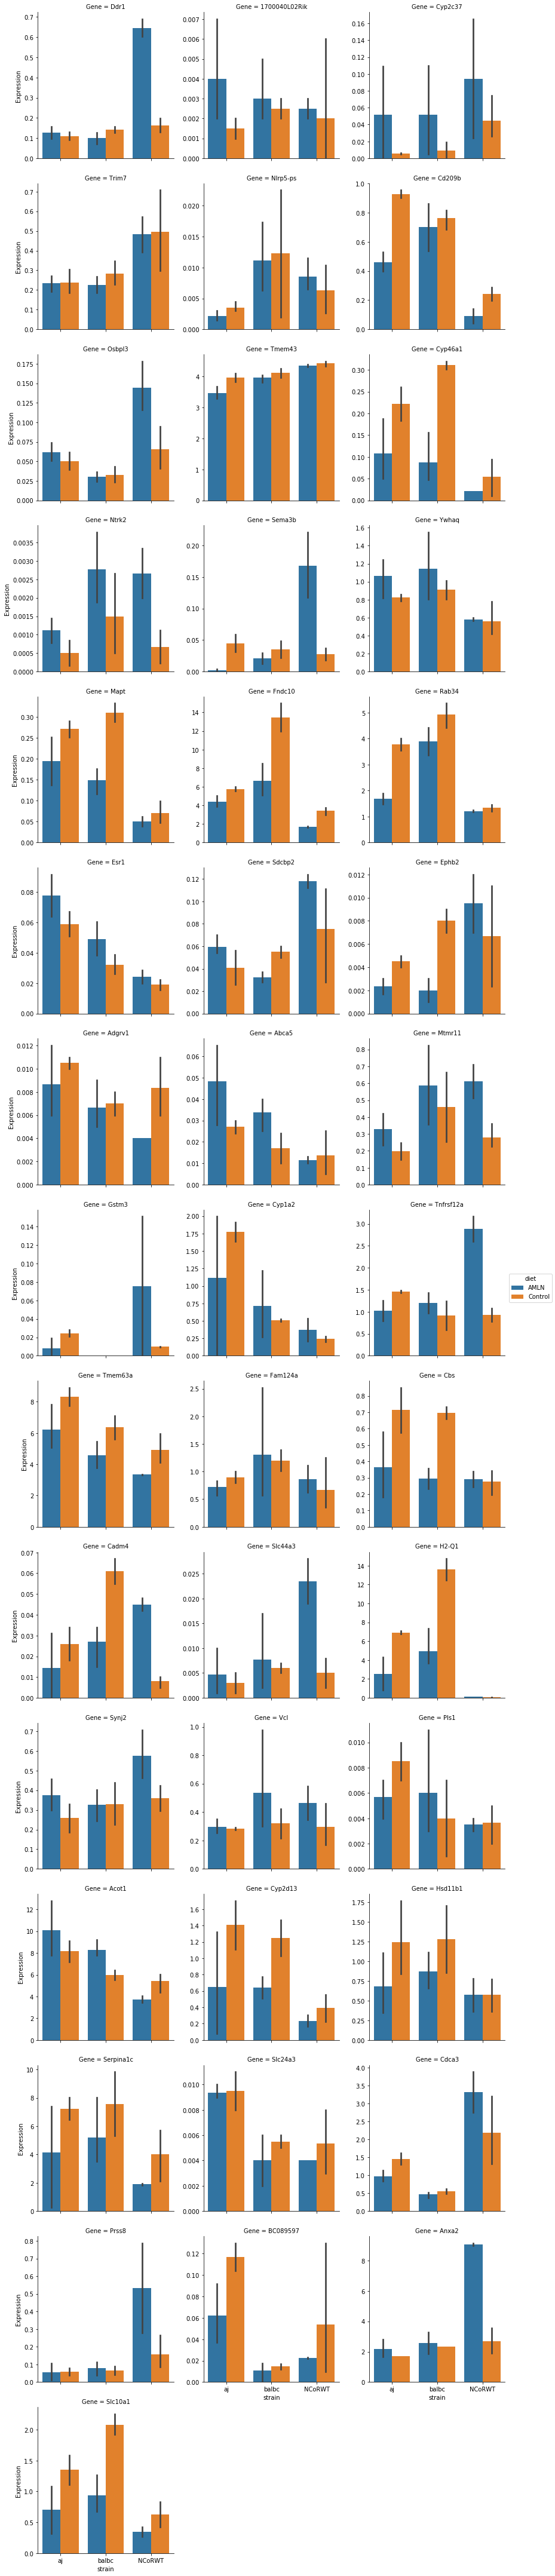

In [78]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + ncorwt_spec_genes + '\|'))